In [1]:
# Raúl Fuentes - TFG FÍSICA 2020
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare
from scipy.stats import chi2
from sklearn import metrics
import scipy

%matplotlib inline


In [2]:
df=pd.DataFrame()
for i in range(2010,2016):
    file=str(i)+'_accidents_tipus_gu_bcn.csv'  
    df1=pd.read_csv(file,encoding='ISO-8859-1')
    df1=df1.rename(columns={"Número d'expedient": "Codi_expedient","N£mero d'expedient":'Codi_expedient','Coordenada UTM (Y)':'Coordenada_UTM_Y','Coordenada UTM (X)':'Coordenada_UTM_X','Descripci¢ dia setmana':'Descripcio_dia_setmana','Descripció dia setmana':'Descripcio_dia_setmana','Nom mes':'Nom_mes'})
    df1=df1.rename(columns={'Mes de any': 'Mes', 'Dia de mes': 'Dia_de_mes','Hora de dia': 'Hora_de_dia','NK Any':'Any','Descripci¢ torn':'Torn','Descripci¢ tipus dia':'Tipus_dia','Descripció torn':'Torn','Descripcio_tipus_dia':'Tipus_dia','Descripci¢ tipus accident':'Descripcio_tipus_accident'})
    df1=df1.rename(columns={'Codi districte':'Codi_districte','Nom districte':'Nom_districte','Codi barri':'Codi_barri','Nom barri':'Nom_barri','Descripció tipus dia':'Tipus_dia','Descripcio_tipus_dia':'Tipus_dia','Descripcio_torn':'Torn','Nom carrer':'Nom_carrer','Dia setmana':'Dia_setmana','ID_Dia_setmana':'Dia_setmana'})
    df=pd.concat([df,df1],sort=False)
for i in range(2016,2020):
    file=str(i)+'_accidents_tipus_gu_bcn.csv'  
    df1=pd.read_csv(file,encoding='ISO-8859-1')
    df1=df1.rename(columns={"Número d'expedient": "Codi_expedient","N£mero d'expedient":'Codi_expedient','Descripcio_torn':'Torn','Numero_expedient':'Codi_expedient'})
    df1=df1.rename(columns={'Mes_any': 'Mes', 'Dia_mes': 'Dia_de_mes','Hora_dia': 'Hora_de_dia','Descripció tipus dia':'Tipus_dia','Descripcio_tipus_dia':'Tipus_dia'})
    df=pd.concat([df,df1],sort=False)
accidents=np.zeros(s,dtype=int)
df=df.drop(['Descripció tipus accident',"Codi carrer","Num postal caption"],axis=1)
#print(list(df.columns.values))
df=df.reset_index(drop=True)

['Codi_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Nom_carrer', 'Descripcio_dia_setmana', 'Dia_setmana', 'Tipus_dia', 'Any', 'Mes', 'Nom_mes', 'Dia_de_mes', 'Hora_de_dia', 'Torn', 'Descripcio_tipus_accident', 'Coordenada_UTM_Y', 'Coordenada_UTM_X', 'Codi_carrer', 'Num_postal_caption', 'Longitud', 'Latitud', 'Num_postal ', 'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'Descripcio_causa_mediata']


In [ ]:
#df

In [675]:
#df.info()

In [20]:
i=0
day=[]
s=[12,31,24]
while i<len(df):
    h=int(df.loc[i,"Hora_de_dia"])
    d=int(df.loc[i,'Dia_de_mes']-1)
    m=int(df.loc[i,'Mes']-1)
    year=df.loc[i,'Any']
    data=str(year)+'-'+str(m+1)+'-'+str(d+1)+'-'+str(h)
    dat=datetime.strptime(data, "%Y-%m-%d-%H")
    day.append(dat)
    i+=1
df['Data']=day
dfsort=df.sort_values(by='Data')


In [21]:
def set_list(l, i):
  try:
      l[i] += 1
  except IndexError:
      for i in range(i-len(l)+1):
          l.append(0)
      l[i] +=1
def norma(v):
    norm=sum(v)
    j=0
    while j < len(v):
        v[j]=v[j]/norm
        j+=1
    return v
    
def calcany(df,year,colum):
    dife=[]
    D=df.columns.get_loc('Data')
    df=df[df.eval(colum)==year]
    i=0
    while i<len(df)-1:
        interval=int(float((df.iloc[i+1,D]-df.iloc[i,D]).seconds/3600))
        set_list(dife,interval)
        i+=1
    return dife
def logv(v):
    i=0
    while i<len(v):
        if v[i]>0:
            v[i]=math.log(v[i])
        else:
            v[i]=0
        i+=1
    return v
def out0(v):
    k=0
    X=[]
    v1=[]
    while k<len(v):
        if v[k]!=0:
            X.append(k)
            v1.append(v[k])
        k+=1
    v=v1
    return v,X
dicanys={}

In [354]:
landa=[]
prob=0.975
prob2=0.025
for i in range(2010,2020):
    suma=0
    vec=calcany(dfsort,i,'Any')
    j=0
    while j <len(vec):
        suma+=vec[j]*j
        j+=1
    n=sum(vec)
    vec,X=out0(vec)
    noor=norma(vec)
    vecnor=np.copy(noor)
    logvec=logv(noor)
    dicanys[str(i)]=[vecnor,logvec,X,n/suma]
    critical = chi2.ppf(prob, 2*n)/(2*suma)
    critical2 = chi2.ppf(prob2, 2*n)/(2*suma)
    landa.append([n/suma,critical,critical2])


In [23]:
#All days
difetot=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
while i<len(dfsort)-1:
    interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
    difetot[interval]+=1
    i+=1    
suma=0
j=0
while j <len(vec):
    suma+=vec[j]*j
    j+=1
n=sum(vec)
vec,X=out0(vec)
noor=norma(vec)
vecnor=np.copy(noor)
logvec=logv(noor)
dicanys['All']=[vecnor,logvec,X,n/suma]

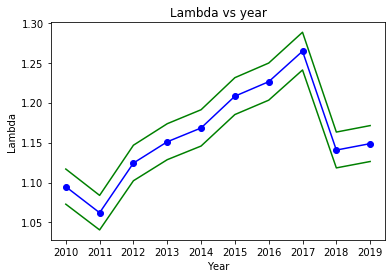

In [326]:
landa=np.asarray(landa)
anyss=[]
for i in dfsort.Any.unique():
    anyss.append(str(i))
plt.figure()
plt.plot(anyss,landa[:,0],'-bo')
plt.plot(anyss,landa[:,1],'-g')
plt.plot(anyss,landa[:,2],'-g')
plt.title('Lambda vs year')
plt.xlabel('Year')
plt.ylabel('Lambda')
plt.savefig('fig/lambda.jpg')

0.4800990193724395
0.4514060553058891
0.46641571769048534
0.45551028183558984
0.4523757132632218
0.4676908273129375
0.486728990612683
0.4861513979910716
0.4728611930927537
0.45934421528447755


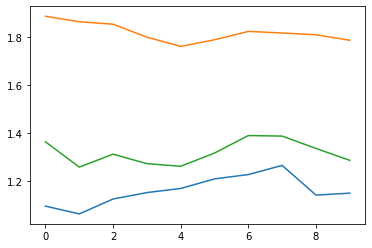

In [350]:
plt.figure()
plt.plot(landa[:,0])
plt.plot(-1/coef[:,0])
plt.plot(-coef[:,2])

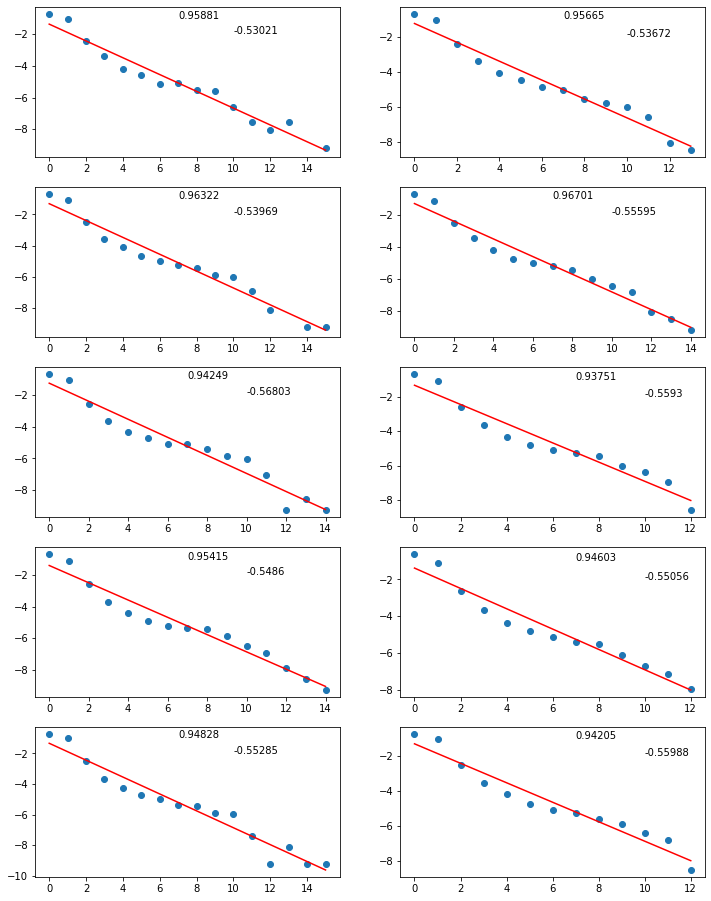

In [416]:
intercept=[]
coef=[]
plt.figure(figsize=(12, 16))
k=1
XS=[]
YS=[]

for i in range(2010,2020):
    Y = np.asarray(dicanys[str(i)][1]).reshape(-1, 1)
    X = np.asarray(dicanys[str(i)][2]).reshape(-1, 1)
    XS.append(X)
    YS.append(Y)
    linear_regressor = LinearRegression()  # create object for the class
    reg=linear_regressor.fit(X,Y)  # perform linear 
    Y_pred = linear_regressor.predict(X) 
    intercept.append(reg.intercept_)
    syx=metrics.mean_squared_error(Y, Y_pred)*len(Y)/(len(Y)-2)
    meanx=sum(X)/len(X)
    tot=0
    for i in X:
        tot+=(i-meanx)**2
    coef.append([float(reg.coef_),2*syx/tot,float(reg.intercept_)])
    plt.subplot(5,2,k)
    plt.scatter(X, Y)
    plt.annotate(float("{:.5f}".format(float(reg.coef_))),(10,-2))
    plt.annotate(float("{:.5f}".format(r2_score(Y, Y_pred))),(7,-1))

    plt.plot(X, Y_pred, color='red')
    k+=1

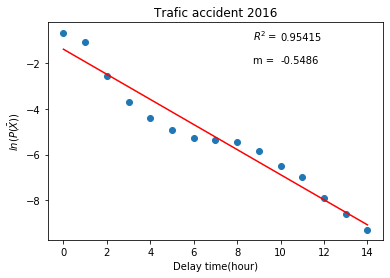

In [383]:
Y = np.asarray(dicanys['2016'][1]).reshape(-1, 1)
X = np.asarray(dicanys['2016'][2]).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
reg=linear_regressor.fit(X,Y)  # perform linear 
Y_pred = linear_regressor.predict(X) 
syx=metrics.mean_squared_error(Y, Y_pred)*len(Y)/(len(Y)-2)
plt.figure()
plt.scatter(X, Y)
plt.annotate("$R^2=$",(8.75,-1))
plt.annotate("m =",(8.75,-2))
plt.annotate(float("{:.5f}".format(float(reg.coef_))),(10,-2))
plt.annotate(float("{:.5f}".format(r2_score(Y, Y_pred))),(10,-1))
plt.plot(X, Y_pred, color='red')
plt.title('Trafic accident 2016')
plt.xlabel('Delay time(hour)')
plt.ylabel(r'$ln(P(\bar{X}))$')
plt.savefig('fig/examplelin2016.jpg')

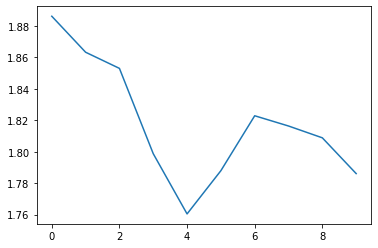

In [421]:
coef=np.asarray(coef)

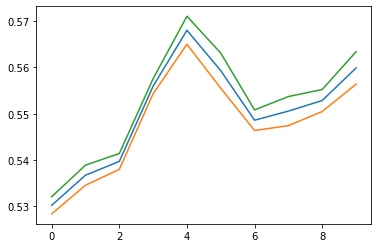

In [27]:
plt.figure()
plt.plot(coef[:,0]*-1,)
plt.plot((coef[:,0]+coef[:,1])*-1)
plt.plot((coef[:,0]-coef[:,1])*-1)

In [28]:
# 2010
dife=np.zeros(24)
i=0
sumaa=0
Dataa=dfsort.columns.get_loc("Data")
while i<len(dfsort)-1:
    if (dfsort['Any']==2010).iloc[i]:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife[interval]+=1
    i+=1

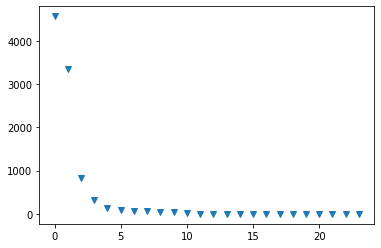

In [32]:
plt.plot(dife,'v')

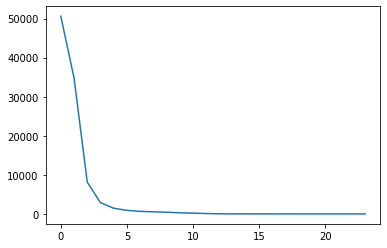

In [33]:
# [2010-2019]
difetot=np.zeros(24)
i=0
sumaa=0
Dataa=dfsort.columns.get_loc("Data")
while i<len(dfsort)-1:
    interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
    difetot[interval]+=1
    i+=1
plt.plot(difetot)


In [34]:
def calcany1(df,par,colum):
    dife=[]
    D=df.columns.get_loc('Dia_setmana')
    df=df[df.eval(colum)==par]
    i=0
    while i<len(df)-1:
        interval=int(float((df.iloc[i+1,D]-df.iloc[i,D]).seconds/3600))
        set_list(dife,interval)
        i+=1

In [35]:
"""di=[]
ds=dfsort.columns.get_loc('Dia_setmana')
i=0
while i<len(dfsort):
    if dfsort.iloc[i,ds] not in di:
        di.append(dfsort.iloc[i,ds])
    i+=1
print(di)"""

['Dv', 'Ds', 'Dg', 'Dl', 'Dm', 'Dc', 'Dj']


In [258]:
dies=['Dl','Dm','Dc','Dj','Dv','Ds','Dg']
diescount=[]
D=dfsort.columns.get_loc('Data')
D2=dfsort.columns.get_loc('Dia_de_mes')
for i in dies:
    dife=[]
    df=dfsort[dfsort.Dia_setmana==i]
    i=0
    while i<len(df)-1:
        if df.iloc[i+1,D2]==df.iloc[i,D2]:
            interval=int(float((df.iloc[i+1,D]-df.iloc[i,D]).seconds/3600))
            set_list(dife,interval)
        i+=1
    diescount.append(dife)

[ 2.59256809  1.01698113  0.01193421  0.14609173 -1.61004548]
0.0035845678573887584


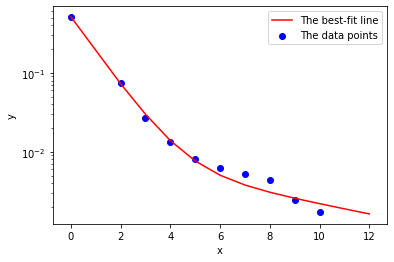

In [373]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#x = np.linspace(0,4,50) # Example data
def func(x, a, b, c, d,e):
    return a *np.exp(-b * (x-e)) + c* np.exp(-d *(x-e))


popt, pcov = curve_fit(func,x,y,p0=(1.0,1.0,1.0,0.9,-2.0),maxfev=10000)

print(popt) 

p1 = popt[0] 
p2 = popt[1] 
p3 = popt[2] 
p4 = popt[3] 
p5 = popt[4]
residuals = y - func(x,p1,p2,p3,p4,p5)
fres = sum( (residuals**2)/func(x,p1,p2,p3,p4,p5) ) 

print(fres)

curvey = func(x,p1,p2,p3,p4,p5)

plt.plot(x, curvey, 'red', label='The best-fit line')
plt.scatter(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[0.48608039 0.89840486 0.31718351 4.18058779]


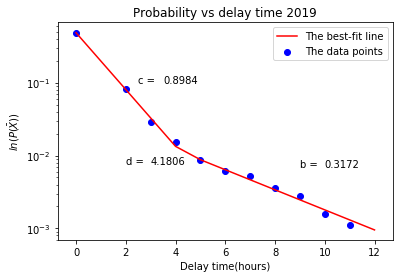

In [407]:
x=[]
k=0
Y = np.asarray(dicanys['2019'][0]).reshape(-1, 1)
X = np.asarray(dicanys['2019'][2]).reshape(-1, 1)
for i in X:
    if k!=1:
        x.append(float(i[0]))
#    x.append(float(i))

    k+=1
x=np.asarray(x)
y=[]
k=0
for i in Y:
    if k!=1:
        y.append(float(i[0]))
#    y.append(float(i))

    k+=1
y=np.asarray(y)
plt.figure()

popt, pcov = curve_fit(func,x,y,p0=(0.5,0.5,0.2,5),maxfev=1000,bounds=([0,0,0,3],2000))

print(popt) 

p1 = popt[0] 
p2 = popt[1] 
#p3 = popt[2] 
p4 = popt[2] 
p5 = popt[3] 

residuals = y - func(x,p1,p2,p4,p5)
fres = sum( (residuals**2)/func(x,p1,p2,p4,p5) ) 

curvey = func(x,p1,p2,p4,p5)
plt.plot(x, curvey, 'red', label='The best-fit line')
plt.scatter(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('Delay time(hours)')
plt.ylabel(r'$ln(P(\bar{X}))$')
plt.yscale("log")
plt.annotate("b =",(9,0.007))
plt.annotate("c =",(2.5,0.1))
plt.annotate("d =",(2,0.0075))
plt.annotate(float("{:.4f}".format(float(p2))),(3.5,0.1))
plt.annotate(float("{:.4f}".format(p4)),(10,0.007))
plt.annotate(float("{:.4f}".format(p5)),(3,0.0075))
plt.title('Probability vs delay time 2019')
plt.savefig('fig/double2019.jpg')

2010
[0.48009136 0.8622923  0.33124215 4.18229358]
2011
[0.48226851 0.86395415 0.35477709 3.82281653]
2012
[0.49725285 0.91853252 0.38463566 3.52922741]
2013
[0.50731588 0.90052318 0.3168433  4.18211947]
2014
[0.50262691 0.95611723 0.30806509 3.78135584]
2015
[0.5136199  0.96892808 0.33467821 3.70506555]
2016
[0.51672014 0.95946143 0.2859106  4.15777815]
2017
[0.53373172 0.99319747 0.35121466 3.64959973]
2018
[0.48415887 0.9124285  0.3467695  3.84511304]
2019
[0.48608039 0.89840486 0.31718351 4.18058779]


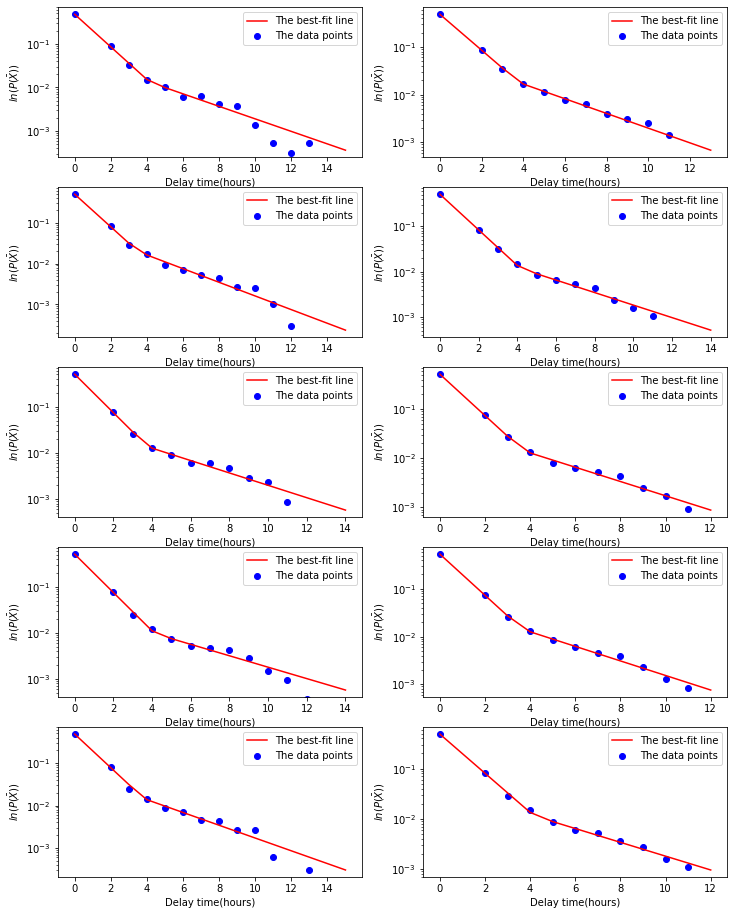

In [385]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
titles=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
def step(x):
    return 1 * (x > 0)

def func(x, a, b,d,e):
    return a*np.exp(-b * x)*step(e-x) + a*np.exp(-b * e)*np.exp(-d *(x-e))*step(x-e)
n=1
plt.figure(figsize=(12, 16))
for s in (titles):
    print(s)
    x=[]
    k=0
    Y = np.asarray(dicanys[s][0]).reshape(-1, 1)
    X = np.asarray(dicanys[s][2]).reshape(-1, 1)
    for i in X:
        if k!=1:
            x.append(float(i[0]))
        k+=1
    x=np.asarray(x)
    y=[]
    k=0
    for i in Y:
        if k!=1:
            y.append(float(i[0]))
        k+=1
    y=np.asarray(y)

    popt, pcov = curve_fit(func,x,y,p0=(0.5,0.5,0.2,5),maxfev=1000,bounds=([0,0,0,3],2000))

    print(popt) 

    p1 = popt[0] 
    p2 = popt[1]
    #p3 = popt[2] 
    p4 = popt[2] 
    p5 = popt[3] 

    residuals = y - func(x,p1,p2,p4,p5)
    fres = sum( (residuals**2)/func(x,p1,p2,p4,p5) ) # The chi-sqaure of your fit

    curvey = func(x,p1,p2,p4,p5) 
    plt.subplot(5,2,n)
    plt.plot(x, curvey, 'red', label='The best-fit line')
    plt.scatter(x,y, c='b',label='The data points')
    plt.legend(loc='best')
    plt.xlabel('Delay time(hours)')
    plt.ylabel(r'$ln(P(\bar{X}))$')
    plt.yscale("log")
    n+=1

In [432]:
two=[[0.48009136,0.8622923,0.33124215,4.18229358],[0.48226851,0.86395415,0.35477709,3.82281653],[0.49725285,0.91853252,0.38463566,3.52922741],[0.50731588,0.90052318,0.3168433,4.18211947],[0.50262691,0.95611723,0.30806509,3.78135584],[0.5136199,0.96892808,0.33467821,3.70506555],[0.51672014,0.95946143,0.2859106,4.15777815],[0.53373172,0.99319747,0.35121466,3.64959973],[0.48415887,0.9124285,0.3467695,3.84511304],[0.48608039,0.89840486,0.31718351,4.18058779]]
two=np.asarray(two)
print(np.std(two[:,1])/len(two[:,1]),np.std(two[:,2])/len(two[:,2]),np.std(two[:,3])/len(two[:,3]))
print(1/np.mean(two[:,1]),1/np.mean(two[:,2]),np.mean(two[:,3]))



0.004227938784169204 0.0026491413491334906 0.023781278425985614
1.082973097133204 3.001813302359743 3.9035957089999997


In [41]:
tesst=[]
D=dfsort.columns.get_loc('Data')
df18=dfsort[dfsort.Any==2018]
i=0
while i<len(df18)-1:
    interval=int(float((df18.iloc[i+1,D]-df18.iloc[i,D]).seconds/3600))
    tesst.append(interval)
    i+=1

In [677]:
"""desv=[]
sumatori=0
xmean=np.mean(tesst)
for i in tesst:
    sumatori+=(i-xmean)**2
sumatori=(sumatori/(n-1))**0.5
for i in tesst:
    desv.append(((i-xmean)/sumatori)**2)"""

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [538]:
r1=[]
r2=[]
scicoef1=[]
scicoef2=[]
rtot=[]
errtot=[]
plt.figure(figsize=(12, 16))
k=1
def arra(x):
    X=[]
    for i in x:
        X.append(float(i[0]))
    X=np.asarray(X)
    return X
for i in range(2010,2020):
    rr=[]
    err=[]
    for j in range (3,10):
        Y1 = np.asarray(dicanys[str(i)][1][:j]).reshape(-1, 1)
        X1 = np.asarray(dicanys[str(i)][2][:j]).reshape(-1, 1)
        Y2 = np.asarray(dicanys[str(i)][1][j:]).reshape(-1, 1)
        X2 = np.asarray(dicanys[str(i)][2][j:]).reshape(-1, 1)
        x1=arra(X1)
        y1=arra(Y1)
        x2=arra(X2)
        y2=arra(Y2) 
        linear_regressor = LinearRegression()  # create object for the class
        reg1=linear_regressor.fit(X1,Y1)  # perform linear 
        reg2=linear_regressor.fit(X2,Y2)  # perform linear 

        Y_pred = linear_regressor.predict(X1) 
        Y_pred = linear_regressor.predict(X2)
        
        slope1, intercept, r_value1, p_value, std_err1 = scipy.stats.linregress(x1, y1)
#        scicoef1.append([slope, intercept, r_value1, p_value, std_err1])
        if j==5:
            scicoef1.append(r_value1)
        r1.append(r_value1)
        slope2, intercept, r_value2, p_value, std_err2 = scipy.stats.linregress(x2, y2)
        r2.append(r_value2)
        if j==5:
            scicoef2.append(r_value2)
#        scicoef2.append([slope, intercept, r_value2, p_value, std_err2])
        rr.append(r_value1*r_value2)
        err.append((std_err1**2+std_err2**2)**0.5)
    rtot.append(rr)
    errtot.append(err)

<Figure size 864x1152 with 0 Axes>

Text(0, 0.5, 'Derivate of standard error')

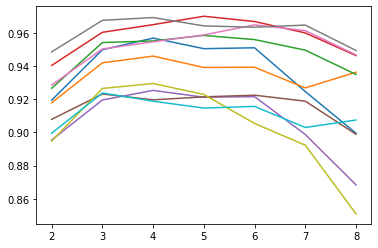

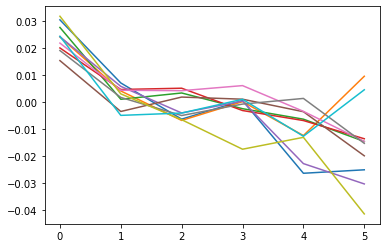

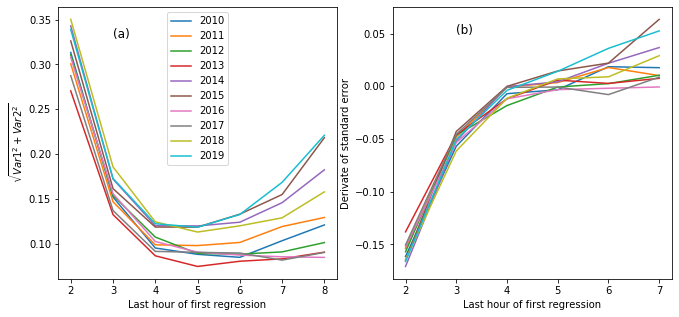

In [539]:
from numpy import diff
dx = 1
oo=[2,3,4,5,6,7,8]
plt.figure()
for i in rtot:
    plt.plot(oo,i)
plt.figure()
for i in rtot:
    dy = diff(i)/dx
    plt.plot(dy)
oo2=[2,3,4,5,6,7]
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.xlabel('Last hour of first regression')
plt.ylabel('$\sqrt{Var1^2+Var2^2}$')
k=0
plt.annotate('(a)',(3,0.33),fontsize='large')
for i in errtot:
    plt.plot(oo,i,label=titles[k])
    k+=1
plt.legend(loc='best',fontsize='medium')
plt.subplot(1,2,2)
for i in errtot:
    dy = diff(i)/dx
    plt.plot(oo2,dy)
plt.annotate('(b)',(3,0.05),fontsize='large')
plt.xlabel('Last hour of first regression')
plt.ylabel('Derivate of standard error')
#plt.savefig('fig/errorderi.jpg')




In [541]:
for i in scicoef1:
    print(float("{:.5f}".format(i)))
print('----')
print(np.mean(scicoef1),np.std(scicoef1)/len(scicoef1))
print('----')
for i in scicoef2:
    print(float("{:.5f}".format(i)))
print('----')
print(np.mean(scicoef2),np.std(scicoef2)/len(scicoef2))
print('----')


-0.98759
-0.98775
-0.98339
-0.99032
-0.98611
-0.98721
-0.98782
-0.98962
-0.98152
-0.98412
----
-0.9865471806202851 0.00026380443506268355
----
-0.96877
-0.95764
-0.97118
-0.97427
-0.93829
-0.9315
-0.96629
-0.97928
-0.94692
-0.93359
----
-0.956772246188671 0.0016943300535908902
----


In [543]:
rtotmean=[[],[],[],[],[],[]]
for i in rtot:
    dy = diff(i)/dx
    j=0
    while j<len(dy):
        rtotmean[j].append(dy[j])
        j+=1
rtotmean=np.asarray(rtotmean)
errtotmean=[[],[],[],[],[],[]]
for i in errtot:
    dy = diff(i)/dx
    j=0
    while j<len(dy):
        errtotmean[j].append(dy[j])
        j+=1
errtotmean=np.asarray(errtotmean)
k=0
r=[]
e=[]
while k<len(rtotmean):
    r.append([abs(np.mean(rtotmean[k])/len(rtotmean[k])),np.var(rtotmean[k])**0.5])
    e.append([abs(np.mean(errtotmean[k])/len(errtotmean[k])),np.var(errtotmean[k])**0.5])
    k+=1
r=np.asarray(r)
e=np.asarray(e)

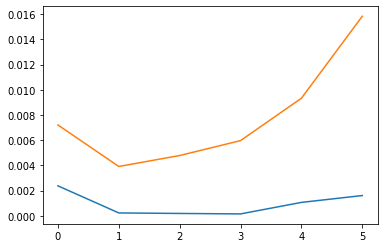

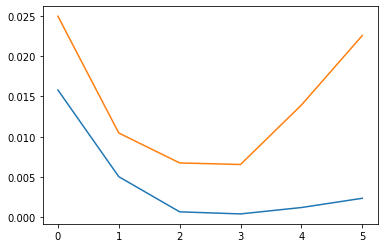

In [544]:
"""
print(rtotmean,rtotmean/len(rtotmean))
print(errtotmean,errtotmean/len(errtotmean))
plt.plot(abs(rtotmean)/len(rtotmean))
plt.figure()
plt.plot(abs(errtotmean)/len(errtotmean))"""

plt.plot(r[:,0])
plt.plot(r[:,0]+r[:,1])

plt.figure()
plt.plot(e[:,0])
plt.plot(e[:,0]+e[:,1])


In [48]:
def set_list1(l, i,dist):
  try:
      l[i] += dist
  except IndexError:
      for i in range(i-len(l)+1):
          l.append(0)
      l[i] += dist
D=dfsort.columns.get_loc('Data')
CORY=dfsort.columns.get_loc('Coordenada_UTM_Y')
CORX=dfsort.columns.get_loc('Coordenada_UTM_X')
tesst=[]
times=[]
dist=[]
df18=dfsort[dfsort.Dia_setmana==2018]
i=0
while i<len(df18)-1:
    interval=int(float((df18.iloc[i+1,D]-df18.iloc[i,D]).seconds/3600))
    dista=((float(df18.iloc[i+1,CORX])-float(df18.iloc[i,CORX]))**2+(float(df18.iloc[i+1,CORY])-float(df18.iloc[i,CORY]))**2)**0.5
    set_list1(dist,interval,dista)
    set_list(times,interval)
    tesst.append(interval)
    i+=1

In [625]:
difeall=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
Tor=dfsort.columns.get_loc("Torn")
DiaS=dfsort.columns.get_loc("Dia_setmana")
while i<len(dfsort)-1:
    if dfsort.iloc[i,Tor]!='x' and dfsort.iloc[i+1,Tor]!='x' and dfsort.iloc[i+1,DiaS]==dfsort.iloc[i,DiaS]:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        difeall[interval]+=1
    i+=1
difeall,x=out0(difeall)
difeall=norma(difeall)
difeall=logv(difeall)

In [650]:
dife=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
Tor=dfsort.columns.get_loc("Torn")
DiaS=dfsort.columns.get_loc("Dia_setmana")
while i<len(dfsort)-1:
    if dfsort.iloc[i,Tor]!='Nit' and dfsort.iloc[i+1,Tor]!='Nit' and dfsort.iloc[i+1,DiaS]==dfsort.iloc[i,DiaS]:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife[interval]+=1
    i+=1

[47658.0, 30448.0, 5515.0, 1300.0, 443.0, 164.0, 78.0, 27.0, 10.0, 3.0, 1.0]


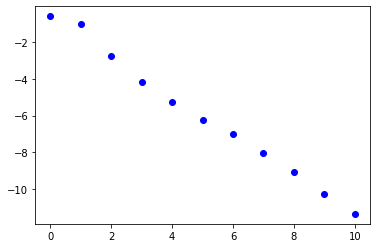

In [651]:
dife,x=out0(dife)
print(dife)
dife=norma(dife)
difed=logv(dife)
plt.plot(difed,'bo')

In [668]:
dife=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
Tor=dfsort.columns.get_loc("Torn")
DiaS=dfsort.columns.get_loc("Dia_setmana")
while i<len(dfsort)-1:
    if dfsort.iloc[i,Tor]=='Nit' and dfsort.iloc[i+1,Tor]=='Nit':
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife[interval]+=1
    i+=1
dife,x=out0(dife)
dife=norma(dife)
dife=logv(dife)

0.988834346753639
-0.5752537917292696
-1.0834821267918553
0.994038382050318


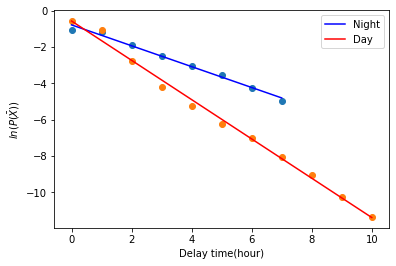

In [669]:
plt.figure()
Y=np.asarray(dife).reshape(-1, 1)
X = np.arange(len(Y)).reshape(-1, 1)
reg=linear_regressor.fit(X,Y)  # perform linear 
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue',label='Night')
print(r2_score(Y, Y_pred))
print(float(reg.coef_))



Y=np.asarray(difed).reshape(-1, 1)
X = np.arange(len(Y)).reshape(-1, 1)
reg=linear_regressor.fit(X,Y)  # perform linear 
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
print(float(reg.coef_))
plt.plot(X, Y_pred, color='red',label='Day')
print(r2_score(Y, Y_pred))
plt.xlabel('Delay time(hour)')
plt.ylabel(r'$ln(P(\bar{X}))$')
plt.legend(loc='best')
plt.savefig('fig/dianit.jpg')

[5.0580e+04 3.4801e+04 8.1190e+03 2.8750e+03 1.4560e+03 9.0600e+02
 6.4600e+02 5.3900e+02 4.3100e+02 2.8500e+02 1.9500e+02 9.7000e+01
 3.3000e+01 1.9000e+01 9.0000e+00 8.0000e+00 0.0000e+00 2.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00] 101002.0


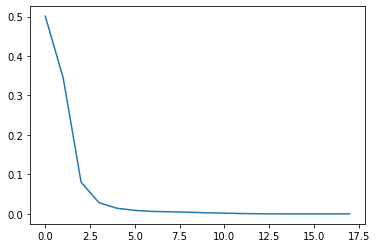

In [562]:
dife=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
Tor=dfsort.columns.get_loc("Torn")
DiaS=dfsort.columns.get_loc("Dia_setmana")
while i<len(dfsort)-1:
    if dfsort.iloc[i+1,DiaS] not in [] and dfsort.iloc[i,DiaS] not in []:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife[interval]+=1
    i+=1
print(dife,sum(dife))
dife,x=out0(dife)
dife=norma(dife)
#dife=logv(dife)
plt.plot(dife)

[2.694e+03 2.732e+03 1.218e+03 5.640e+02 2.940e+02 1.630e+02 1.050e+02
 4.800e+01 2.900e+01 1.800e+01 1.500e+01 9.000e+00 1.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00] 7891.0


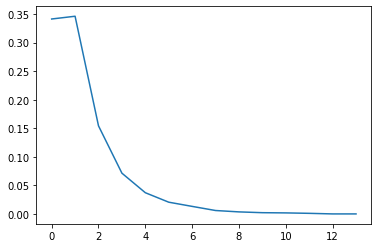

In [559]:
dife1=np.zeros(24)
i=0
Dataa=dfsort.columns.get_loc("Data")
Tor=dfsort.columns.get_loc("Torn")
DiaS=dfsort.columns.get_loc("Dia_setmana")
while i<len(dfsort)-1:
    if dfsort.iloc[i+1,DiaS] not in ['Dv', 'Ds', 'Dl', 'Dm', 'Dc', 'Dj'] and dfsort.iloc[i,DiaS] not in ['Dv', 'Ds', 'Dl', 'Dm', 'Dc', 'Dj']:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife1[interval]+=1
    i+=1
print(dife1,sum(dife1))
dife1,x=out0(dife1)
"""mix=[]
iniciaa=(dife[0]+dife[1])
mix.append(iniciaa)
for i in dife[2:]:
    mix.append(i)"""
dife1=norma(dife1)
#dife1=logv(dife1)
plt.plot(dife1)

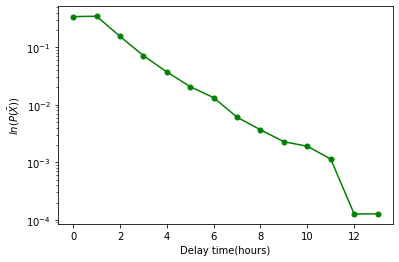

In [684]:
plt.figure()
#plt.plot(dife,'bv',markersize=3,label='All days')
plt.plot(dife1,'-go',markersize=5,label='Sunday')
plt.yscale("log")
plt.xlabel('Delay time(hours)')
plt.ylabel(r'$ln(P(\bar{X}))$')
plt.savefig('fig/All-Dg.png')

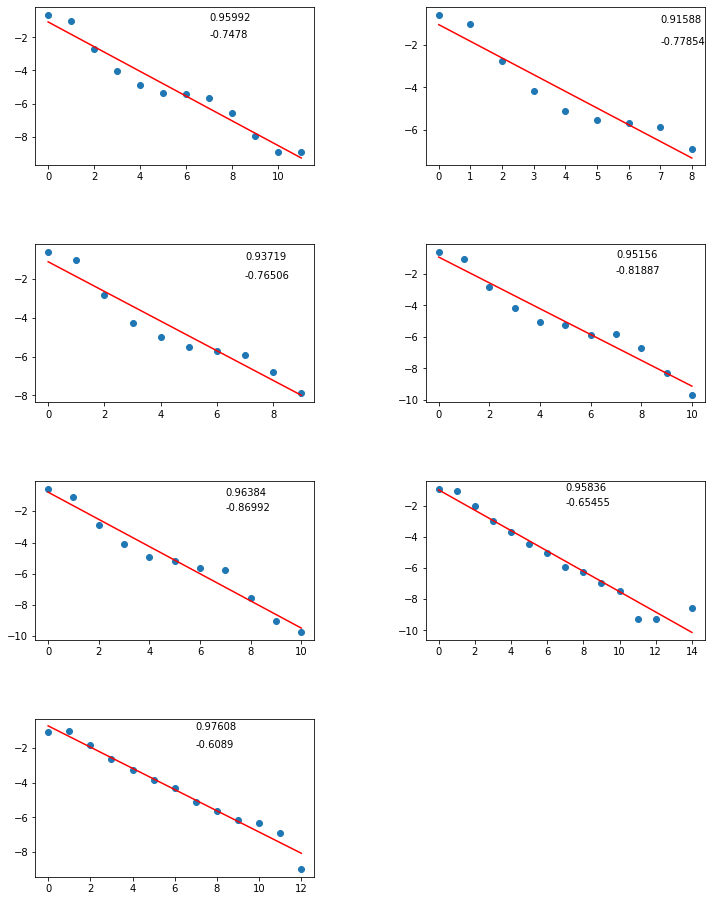

<Figure size 864x1152 with 0 Axes>

In [259]:
intercept=[]
coef=[]
plt.figure(1,figsize=(12, 16))
plt.subplots_adjust(hspace=.5,wspace=0.4)

plt.figure(2,figsize=(12, 16))
plt.subplots_adjust(hspace=.5,wspace=0.4)

from sklearn.metrics import r2_score
for k in range(0,7):
    vec,X=out0(diescount[k])
    dife2=norma(vec)
    dife2=logv(dife2)
    Y=np.asarray(dife2).reshape(-1, 1)
    X = np.asarray(X).reshape(-1, 1)
    linear_regressor = LinearRegression()  # create object for the class
    reg=linear_regressor.fit(X,Y)  # perform linear 
    Y_pred = linear_regressor.predict(X) 
    intercept.append(reg.intercept_)
    syx=metrics.mean_squared_error(Y, Y_pred)*len(Y)/(len(Y)-2)
    meanx=sum(X)/len(X)
    tot=0
    for i in X:
        tot+=(i-meanx)**2
    coef.append([float(reg.coef_),2*syx/tot,float(reg.intercept_)])
    plt.figure(1)
    plt.subplot(4,2,k+1)
    plt.scatter(X, Y)
    plt.annotate(float("{:.5f}".format(float(reg.coef_))),(7,-2))
    plt.plot(X, Y_pred, color='red')
    plt.annotate(float("{:.5f}".format(r2_score(Y, Y_pred))),(7,-1))
    """    plt.figure(2)
    plt.subplot(4,2,k+1)
    plt.plot(X, Y_pred, color='blue')"""
    k+=1


In [359]:
diescount[6]

[2697, 2734, 1218, 565, 294, 163, 104, 47, 29, 17, 14, 8, 1, 0]

In [465]:

def func(x, a, b,d,e):
    return a*np.exp(-b * x)*step(e-x) + a*np.exp(-b * e)*np.exp(-d *(x-e))*step(x-e)



popt, pcov = curve_fit(func,x,y,p0=(0.5,0.5,0.2,5),maxfev=1000,bounds=([0,0,0,3],2000))

print(popt) # This contains your three best fit parameters

p1 = popt[0] # This is your a
p2 = popt[1] # This is your b
p4 = popt[2] # This is your c
p5 = popt[3] # This is your c

residuals = y - func(x,p1,p2,p4,p5)
fres = sum( (residuals**2)/func(x,p1,p2,p4,p5) ) # The chi-sqaure of your fit


""" Now if you need to plot, perform the code below """
curvey = func(x,p1,p2,p4,p5) # This is your y axis fit-line

plt.plot(x, curvey, 'red', label='The best-fit line')
plt.scatter(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale("log")
plt.show()

[[-0.7477991272974667, array([0.00467012]), -1.0662576135942787],
 [-0.7785419787887315, array([0.01590686]), -1.0650996673703839],
 [-0.7650619161268192, array([0.00980713]), -1.106570710368822],
 [-0.8188739965858833, array([0.00758543]), -0.931418494443303],
 [-0.8699191150968348, array([0.00630953]), -0.7774720190124906],
 [-0.6545480440078822, array([0.00310283]), -0.964008867458749],
 [-0.6089033484975207, array([0.00165173]), -0.7472823625994058]]

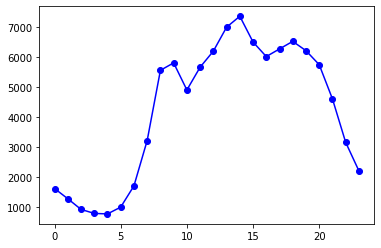

In [643]:
hores=np.zeros(24)
Horaa=dfsort.columns.get_loc("Hora_de_dia")
for j in dfsort.Dia_setmana.unique():
    i=0
    df=dfsort[dfsort.Dia_setmana==j]
    while i<len(df):
        h=int(df.iloc[i,Horaa])
        hores[h]+=1
        i+=1
plt.plot(hores,'-bo')


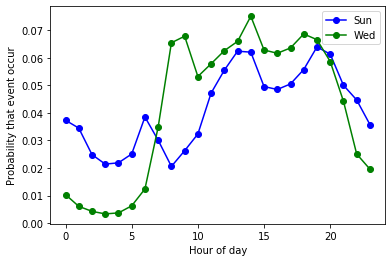

In [673]:
"""for j in dfsort["Dia_setmana"].unique():
    hores=np.zeros(24)
    df=dfsort[dfsort.Dia_setmana==j]
    i=0
    while i<len(df):
        h=int(df.iloc[i,Horaa])
        hores[h]+=1
        i+=1
    plt.plot(hores,'-bo')"""

i=0
hores=np.zeros(24)
df=dfsort[dfsort.Dia_setmana=='Dg']
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(norma(hores),'-bo',label='Sun')
plt.xlabel('Hour of day')
#plt.ylabel('Number of events')
plt.ylabel('Probability that event occur')


i=0
hores1=np.zeros(24)
df=dfsort[dfsort.Dia_setmana=='Dm']
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores1[h]+=1
    i+=1
plt.plot(norma(hores1),'-go',label='Wed')
plt.legend(loc='best')
plt.savefig('fig/diumenge24.jpg')

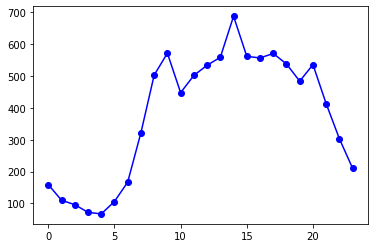

In [583]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==10]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

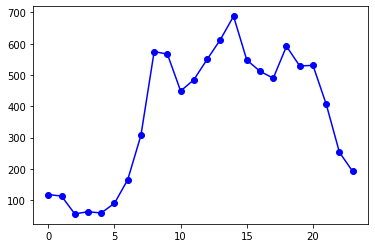

In [584]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==11]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

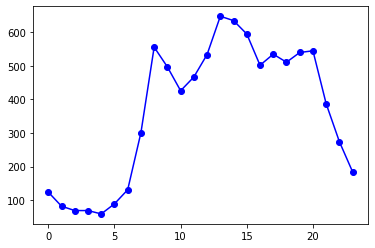

In [585]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==3]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

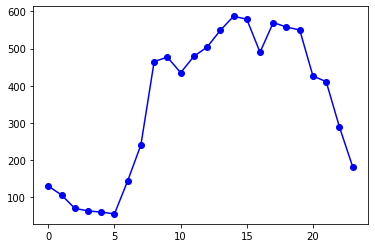

In [586]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==4]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

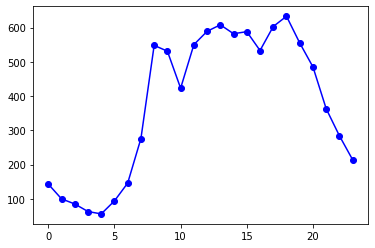

In [587]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==5]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

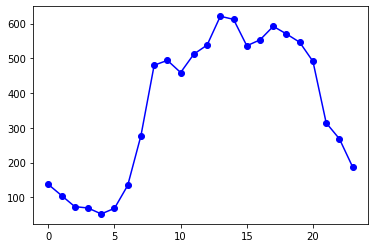

In [588]:
hores=np.zeros(24)
df=dfsort[dfsort.Mes==6]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

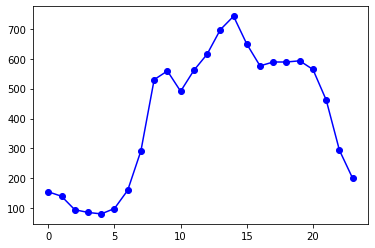

In [600]:
hores=np.zeros(24)
df=dfsort[dfsort.Any==2012]
i=0
while i<len(df):
    h=int(df.iloc[i,Horaa])
    hores[h]+=1
    i+=1
plt.plot(hores,'-bo')

In [74]:
delay=[]
i=0
sumaa=0
Dataa=dfsort.columns.get_loc("Data")
while i<2000:
    interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
    delay.append(interval)
    i+=1


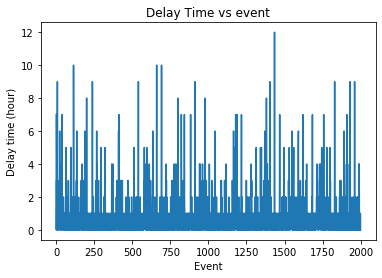

In [59]:
plt.figure()
plt.title('Delay Time vs event')
plt.axis()
plt.plot(delay,markersize=2)
plt.xlabel('Event')
plt.ylabel('Delay time (hour)')
plt.savefig('delaytime.jpg')

In [264]:
dife=np.zeros(24)
i=0
sumaa=0
Dataa=dfsort.columns.get_loc("Data")
while i<len(dfsort)-1:
    if (dfsort['Any']==2010).iloc[i]:
        interval=int(float((dfsort.iloc[i+1,Dataa]-dfsort.iloc[i,Dataa]).seconds/3600))
        dife[interval]+=1
    i+=1

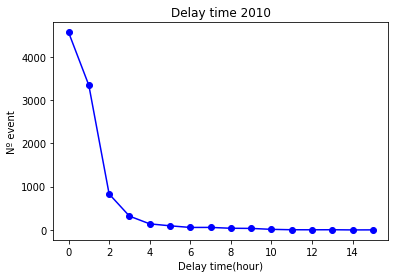

In [265]:
dife,X=out0(dife)
plt.figure()
plt.title('Delay time 2010')
plt.axis()
plt.plot(X,dife,'-bo')
plt.xlabel('Delay time(hour)')
plt.ylabel('Nº event')
plt.savefig('fig/2010.jpg')

In [222]:
"""T1 = [0, 0, 0, 0, 1, 1, 4]
E1 = [1, 1, 1,  1,  1,  1, 1]
T2 = [0, 0, 0, 1, 0,1 ,3]
E2 = [1, 1, 1,  1,  1,  1, 1]"""
import lifelines
from lifelines.statistics import logrank_test
from scipy.stats import ttest_ind

k=0
a=np.zeros(shape=(10,10))
b=np.zeros(shape=(10,10))
c=np.zeros(shape=(10,10))

for m in range (2010,2020):
    l=0
    delay1=[]
    D=dfsort.columns.get_loc('Data')
    df11=dfsort[dfsort.Any==m]
    i=0
    while i<len(df11)-1:
        interval=int(float((df11.iloc[i+1,D]-df11.iloc[i,D]).seconds/3600))
        delay1.append(interval)
        i+=1
    T1=delay1
    E1=np.ones(len(T1))
    for n in range(2010,2020):
        delay2=[]
        df12=dfsort[dfsort.Any==n]
        i=0
        while i<len(df12)-1:
            interval=int(float((df12.iloc[i+1,D]-df12.iloc[i,D]).seconds/3600))
            delay2.append(interval)
            i+=1
        T2=delay2
        if len(T2)>=len(T1):
            T2=delay2[0:len(T1)]
        E2=np.ones(len(T2))
        results = logrank_test(T1[:len(T2)], T2, event_observed_A=E1[:len(T2)], event_observed_B=E2)
        a[k,l]=results.p_value
        ttest,pval = ttest_ind(T1[:len(T2)],T2,equal_var = False)
        b[k,l]=pval
        ttest1,pval1=stats.ttest_rel(T1[:len(T2)],T2)
        c[k,l]=pval1
        l+=1
    k+=1



"""results.print_summary()
print(results.p_value)  
print(results.test_statistic) """

'results.print_summary()\nprint(results.p_value)  \nprint(results.test_statistic) '

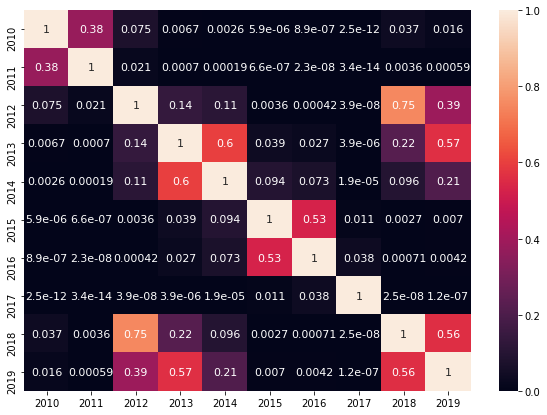

In [674]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(a, index = [i for i in dfsort.Any.unique()],
                  columns = [j for j in dfsort.Any.unique()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 11})
plt.savefig('fig/anyslogrank.jpg')

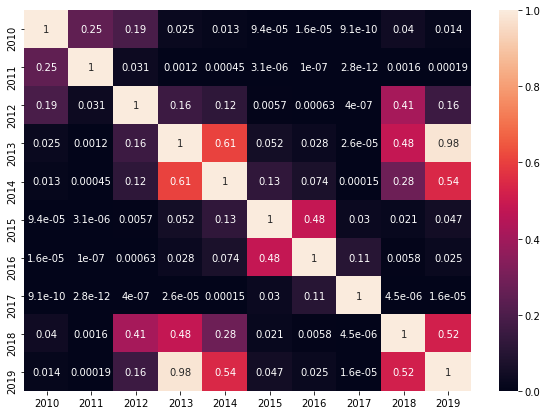

In [236]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(b, index = [i for i in dfsort.Any.unique()],
                  columns = [j for j in dfsort.Any.unique()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

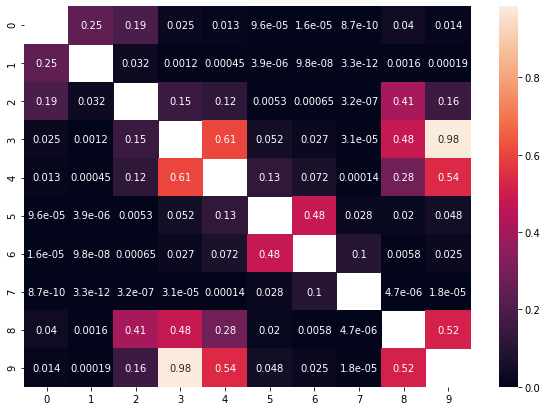

In [225]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(c, index = [i for i in "0123456789"],
                  columns = [j for j in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [119]:
T1 = [1, 4, 10, 12, 12, 3, 5.4]
E1 = [1, 0, 1,  0,  1,  1, 1]

T2 = [4, 5, 7, 11, 14, 20, 8, 8]
E2 = [1, 1, 1, 1,  1,  1,  1, 1]

from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

results.print_summary()
print(results.p_value)        # 0.7676
print(results.test_statistic) # 0.0872

0.7676913033364599
0.08725886275434053


In [121]:
delay1=[]
D=dfsort.columns.get_loc('Data')
df11=dfsort[dfsort.Any==2013]
i=0
while i<len(df11)-1:
    interval=int(float((df11.iloc[i+1,D]-df11.iloc[i,D]).seconds/3600))
    delay1.append(interval)
    i+=1
delay2=[]
df12=dfsort[dfsort.Any==2011]
i=0
while i<len(df12)-1:
    interval=int(float((df12.iloc[i+1,D]-df12.iloc[i,D]).seconds/3600))
    delay2.append(interval)
    i+=1
T1=delay1
E1=np.ones(len(T1))
T2=delay2
E2=np.ones(len(T2))
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


results.print_summary()
print(results.p_value)        # 0.7676
print(results.test_statistic) # 0.0872

0.0003680344991554482
12.687873899397557


In [133]:
delay1=[]
D=dfsort.columns.get_loc('Data')
df11=dfsort[dfsort.Any==2010]
i=0
while i<len(df11)-1:
    interval=int(float((df11.iloc[i+1,D]-df11.iloc[i,D]).seconds/3600))
    delay1.append(interval)
    i+=1
delay2=[]
df12=dfsort[dfsort.Any==2011]
i=0
while i<len(df12)-1:
    interval=int(float((df12.iloc[i+1,D]-df12.iloc[i,D]).seconds/3600))
    delay2.append(interval)
    i+=1
T1=delay1
E1=np.ones(len(T1))
T2=delay2
E2=np.ones(len(T2))
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


results.print_summary()
print(results.p_value)        # 0.7676
print(results.test_statistic) # 0.0872

0.3876698490062508
0.7462382305219188


In [201]:
from scipy.stats import ttest_ind
import numpy as np

T1=[1,1000,1000,1000,1000,1000,1000,1000]
T2=[1,1,1,1,1,1,1,1]

ttest,pval = ttest_ind(T1,T2,equal_var = False)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.00021155485194587255
we reject null hypothesis


In [192]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(T1,T2, value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.2833935000217833
accept null hypothesis


In [228]:
coef

[[-0.530209483071837, array([0.00185801]), -1.3628380391385067],
 [-0.536715833746518, array([0.00217545]), -1.2572480346251504],
 [-0.5396870124623544, array([0.00171098]), -1.3111694224580144],
 [-0.555948534893766, array([0.00162213]), -1.2717193936479423],
 [-0.5680304728242006, array([0.0030292]), -1.2606489850052647],
 [-0.5593043287402423, array([0.00379134]), -1.3158798074940732],
 [-0.5485985323093006, array([0.00222502]), -1.3887966916059034],
 [-0.5505647445859441, array([0.00314419]), -1.386510282177409],
 [-0.552850042512797, array([0.00238164]), -1.3351965658708336],
 [-0.5598816184429433, array([0.00350584]), -1.2854206900341971]]

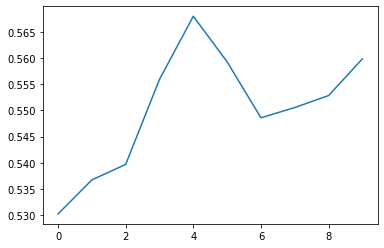

In [234]:
coef=np.asarray(coef)
plt.plot(coef[:,0]*-1)


In [255]:
dies=['Dl','Dm','Dc','Dj','Dv','Ds','Dg']
diescount=[]
D=dfsort.columns.get_loc('Data')
dii=np.zeros(shape=(7,7))
k=0
for n in dies:
    l=0
    delay1=[]
    df11=dfsort[dfsort.Dia_setmana==n]
    i=0
    while i<len(df11)-1:
        interval=int(float((df11.iloc[i+1,D]-df11.iloc[i,D]).seconds/3600))
        delay1.append(interval)
        i+=1
    T1=delay1
    E1=np.ones(len(T1))
    for m in dies:
        delay2=[]
        df12=dfsort[dfsort.Dia_setmana==m]
        i=0
        while i<len(df12)-1:
            interval=int(float((df12.iloc[i+1,D]-df12.iloc[i,D]).seconds/3600))
            delay2.append(interval)
            i+=1
        T2=delay2
        if len(T2)>=len(T1):
            T2=delay2[0:len(T1)]
        E2=np.ones(len(T2))
        results = logrank_test(T1[:len(T2)], T2, event_observed_A=E1[:len(T2)], event_observed_B=E2)
        dii[k,l]=results.p_value
        l+=1
    k+=1

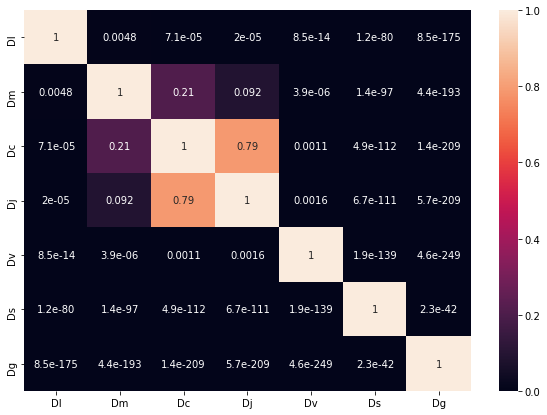

In [256]:
df_cm = pd.DataFrame(dii, index = [i for i in dies],
                  columns = [j for j in dies])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)